In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
colors = ['#B5DEFF','#FCFFA6','#C1FFD7','#CAB8FF','#FFB4B4','#FCC2FC']
sns.set_palette(colors)
sns.set_style("whitegrid")
sns.set_context("paper")
#set font
plt.rcParams['font.family'] = 'Times New Roman'

# Review level

In [22]:
df_review = pd.read_csv('data/reviews.csv')
df_review.head()

,review_id,rating,review,language
0,1.1,5,It is such a nice and romantic restaurant for ...,en
1,1.2,4,Food is marvelous.\nWe ordered the French onio...,en
2,1.3,5,One of those fine dining experience I have in ...,en
3,1.4,5,I have the 4 course set is around HKD 2XX per ...,en
4,1.5,5,"Fav place in sgn\nAmazing food, luxurious atmo...",en


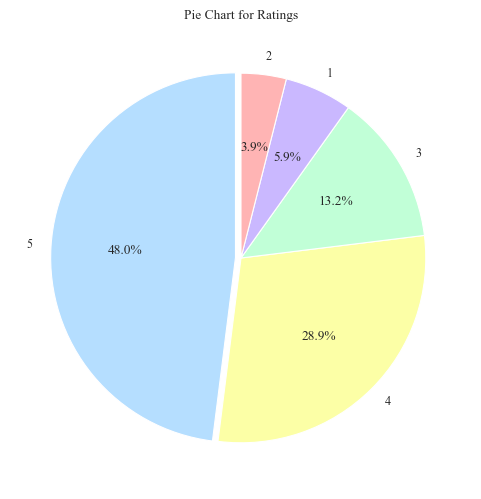

In [55]:
#pie plot for ratings
plt.figure(figsize=(6,6))
df_review['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.03,0,0,0,0],startangle=90)
plt.title('Pie Chart for Ratings')
plt.ylabel('')
plt.show()



In [47]:
df_review.dropna(inplace=True)
df_review['review'] = df_review[df_review['review']!=' ']['review']
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3445 entries, 0 to 3444
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   review_id   3445 non-null   float64
 1   rating      3445 non-null   int64  
 2   review      3445 non-null   object 
 3   language    3445 non-null   object 
 4   sentences   3445 non-null   int64  
 5   word_count  3445 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 188.4+ KB


In [48]:
df_review['word_count'] = df_review['review'].apply(lambda x: len(str(x).split()))
df_review.head()

,review_id,rating,review,language,sentences,word_count
0,1.1,5,It is such a nice and romantic restaurant for ...,en,6,48
1,1.2,4,Food is marvelous.\nWe ordered the French onio...,en,15,182
2,1.3,5,One of those fine dining experience I have in ...,en,5,34
3,1.4,5,I have the 4 course set is around HKD 2XX per ...,en,2,33
4,1.5,5,"Fav place in sgn\nAmazing food, luxurious atmo...",en,1,29


In [52]:
df_len = pd.pivot_table(df_review, columns='rating', values='word_count', aggfunc=np.mean).T.reset_index()
df_len.head()

,rating,word_count
0,1,41.882353
1,2,27.316176
2,3,18.044053
3,4,18.312939
4,5,18.224909


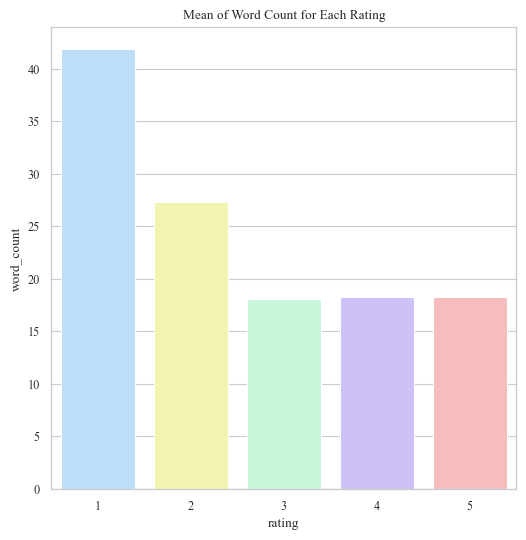

In [56]:
#plot mean of word count for each rating
plt.figure(figsize=(6,6))
sns.barplot( x ='rating', y='word_count', data=df_len)
plt.title('Mean of Word Count for Each Rating')
plt.show()

In [35]:
#count number of sentences in each review
df_review['sentences'] = df_review['review'].apply(lambda x: len(x.split('.')))
df_review.head()

,review_id,rating,review,language,sentences
0,1.1,5,It is such a nice and romantic restaurant for ...,en,6
1,1.2,4,Food is marvelous.\nWe ordered the French onio...,en,15
2,1.3,5,One of those fine dining experience I have in ...,en,5
3,1.4,5,I have the 4 course set is around HKD 2XX per ...,en,2
4,1.5,5,"Fav place in sgn\nAmazing food, luxurious atmo...",en,1


In [3]:
df_review = pd.read_csv('data/reviews_en_sentences_cleaned.csv')
df_review.head()

,review_id,review,word_count
0,1.1,nice romantic restaurant new couple family get...,10
1,1.1,food nice western course,4
2,1.1,drink interesting enjoy,3
3,1.1,nice dinner bos colleague,4
4,1.1,thank nice preparation well,4


In [4]:
#pivot table to count the number sentences per review
df_review_count = df_review.pivot_table(index='review_id', values='review', aggfunc='count')
df_review_count = df_review_count.rename(columns={'review':'sentence_count'})
df_review_count.head()

,sentence_count
review_id,
1.100,14
1.107,3
1.110,6
1.115,2
1.118,2


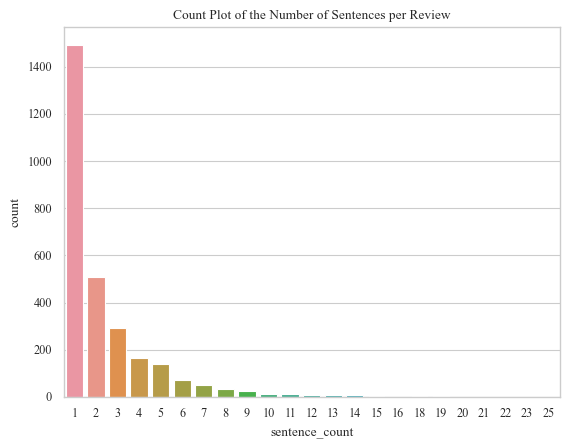

In [58]:
#count plot of the number of sentences per review
sns.countplot(x=df_review_count['sentence_count'])
plt.title('Count Plot of the Number of Sentences per Review')
plt.show()

## Sentence level

In [3]:
df_sentence = pd.read_csv('data/reviews_en_sentences_cleaned.csv')

In [6]:
df_sentence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6801 entries, 0 to 6800
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   review_id   6801 non-null   float64
 1   review      6800 non-null   object 
 2   word_count  6801 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 159.5+ KB


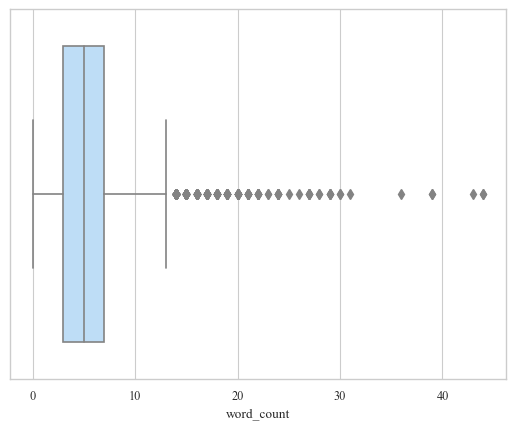

In [61]:
#box plot for number of words per sentence

sns.boxplot(x=df_sentence['word_count'])
plt.show()

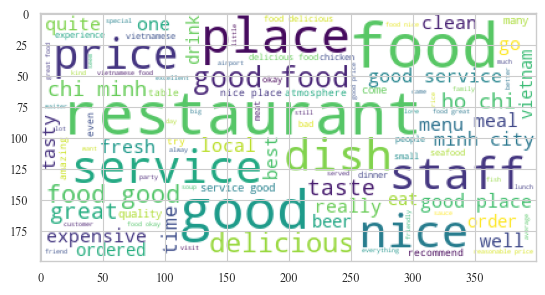

In [69]:
#wordcloud of the most common words in the reviews
corpus = ' '.join(str(review) for review in df_sentence['review'])
wordcloud = WordCloud(background_color='white', 
                      max_words=100, max_font_size=50,
                      contour_color='steelblue',
                      contour_width=3,
                      random_state=42).generate(corpus)
plt.imshow(wordcloud)